In [2]:
using PyPlot

In [3]:
function rho(X, Y)
    l_X = length(X)
    l_Y = length(Y)
    mesh = zeros(Float64, l_X, l_Y)
    for i_x in 2:l_X-1
        for i_y in 2:l_Y-1
            mesh[i_x,i_y] = e^-((X[i_x]-2)^2+Y[i_y]^2)-e^-((X[i_x]+2)^2+Y[i_y]^2)
        end
    end
    return mesh
end;

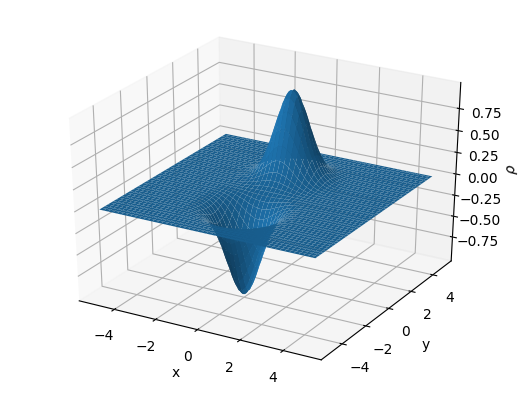

In [77]:
resolution = .01
x = linspace(-5,5,Int(10/resolution)+1)
y = linspace(-5,5,Int(10/resolution)+1)
X = repeat(x', outer=[length(x),1])
Y = repeat(y, outer=[1,length(y)])
Z = rho(x,y)

plot_surface(X,Y,Z)
xlabel("x")
ylabel("y")
zlabel("\$\\rho\$")
show()

In [2]:
function relax(Phi, rho, p, dx, k_max)
    f = Array{Float64}(k_max)
    dimx = size(Phi)[1]
    dimy = size(Phi)[2]
    for k in 1:k_max
        Phi_neu = zeros(Phi)
        for x in 2:dimx-1
            for y in 2:dimy-1
                Phi_neu[x, y] = p*(pi*dx^2*rho[x,y]+.25*(Phi[x+1,y]+Phi[x-1,y]+Phi[x,y+1]+Phi[x,y-1]))+(1-p)*Phi[x,y]
            end
        end
        f[k] = sum(abs(Phi_neu-Phi))
        Phi = Phi_neu
    end
    return (Phi, f)
end;   

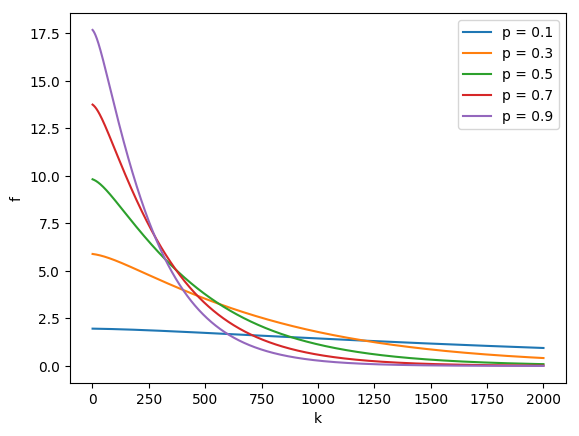

In [82]:
resolution = .2
x = linspace(-5,5,Int(10/resolution)+1)
y = linspace(-5,5,Int(10/resolution)+1)
rho_ = rho(x,y)
Phi = zeros(rho_)
for p in [.1,.3,.5,.7,.9]
    (Phi_i, f_i) = relax(Phi, rho_, p, resolution, 2000)
    plot(1:2000, f_i, label="p = $p")
end
xlabel("k")
ylabel("f")
legend()
show()

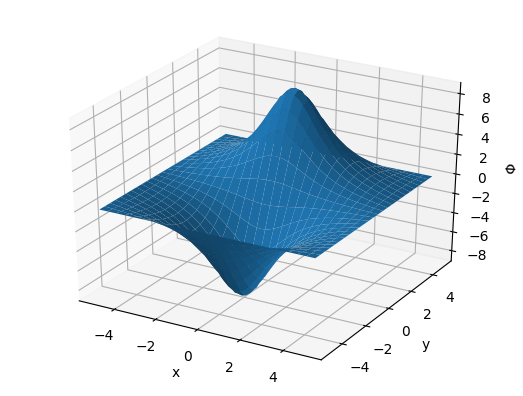

In [85]:
resolution = .2
x = linspace(-5,5,Int(10/resolution)+1)
y = linspace(-5,5,Int(10/resolution)+1)
X = repeat(x', outer=[length(x),1])
Y = repeat(y, outer=[1,length(y)])
rho_ = rho(x,y)
Phi = zeros(rho_)
(Z, f_i) = relax(Phi, rho_, .5, resolution, 2000)

plot_surface(X,Y,Z)
xlabel("x")
ylabel("y")
zlabel("\$\\Phi\$")
show()